## Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Cargamos la base de datos

In [ ]:
#Se carga la base de datos con pandas
df = pd.read_csv('diagnosticos.csv')

In [ ]:
df

,diagnostico1,diagnostico2,diagnostico3,diagnostico4,diagnostico5,diagnostico6,diagnostico7,diagnostico8,diagnostico9,diagnostico10,diagnostico11,diagnostico12
0,S068,NaN,W188,S998,G309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,G309,NaN,F009,F233,F328,NaN,NaN,NaN,NaN,NaN,NaN,G308
2,J441,NaN,J984,J432,J981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J441,NaN,J960,I110,I270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J188,NaN,J440,J432,J980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
167008,S823,S823,V284,S826,S900,S823,NaN,NaN,NaN,NaN,NaN,NaN
167009,S664,S664,W258,NaN,NaN,S664,NaN,NaN,NaN,S664,S664,NaN
167010,E871,E871,NaN,NaN,NaN,E871,NaN,NaN,NaN,NaN,NaN,NaN
167011,N459,N459,R521,NaN,NaN,N459,NaN,NaN,NaN,NaN,NaN,NaN


# Descripción de la base de datos
Esta base de datos consta de 167013 registros, donde cada registro representa un episodio, cada uno de estos episodios tendrá asociado entre 1 y 12 diagnósticos los cuáles estan códificados bajo el estándar de clasificación internacional de enfermedades versión 10 (CIE-10 ó ICD-10 por sus siglas en inglés). https://www.cdc.gov/nchs/icd/index.htm

| Variable          | Descripción                                                                                             |
|------------------|---------------------------------------------------------------------------------------------------------|
| diagnostico1         | Indica el primer diagnóstico codificado en formato CIE-10 del paciente |
| diagnostico2         | Indica el segundo diagnóstico codificado en formato CIE-10 del paciente, algunos pueden aparecer nulos (NaN)                              |
| diagnostico3    | Indica el tercer diagnóstico codificado en formato CIE-10 del paciente, algunos pueden aparecer nulos (NaN)                              |
| diagnostico4     | Indica el cuarto diagnóstico codificado en formato CIE-10 del paciente, algunos pueden aparecer nulos (NaN)                                |
| diagnostico5     | Indica el quinto diagnóstico codificado en formato CIE-10 del paciente, algunos pueden aparecer nulos (NaN)                    |
| diagnostico6      | Indica el sexto diagnóstico codificado en formato CIE-10 del paciente, algunos pueden aparecer nulos (NaN) |
| diagnostico7         | Indica el séptimo diagnóstico codificado en formato CIE-10 del paciente, algunos pueden aparecer nulos (NaN) |
| diagnostico8         | Indica el octavo diagnóstico codificado en formato CIE-10 del paciente, algunos pueden aparecer nulos (NaN) |
| diagnostico9         | Indica el noveno diagnóstico codificado en formato CIE-10 del paciente, algunos pueden aparecer nulos (NaN) |
| diagnostico10         | Indica el décimo diagnóstico codificado en formato CIE-10 del paciente, algunos pueden aparecer nulos (NaN) |
| diagnostico11         | Indica el décimo primer diagnóstico codificado en formato CIE-10 del paciente, algunos pueden aparecer nulos (NaN) |
| diagnostico12         | Indica el décimo segundo diagnóstico codificado en formato CIE-10 del paciente, algunos pueden aparecer nulos (NaN) |

# Problema. Clasificación de diagnósticos
Clasificar cada diagnóstico según sus 3 primeros carácteres, es decir si el diagnóstico es A006, deberás crear una columna llamada 'A00' y asignarle un valor de 1 indicando la presencia de un diagnóstico que comienza por 'A00',

En el siguiente ejemplo se evidencia como la primera muestra tiene asignado un 1 en la columna A00, H34 y M77, lo cuál indica que tiene diágnosticos que comienzan por dichos caracteres.  

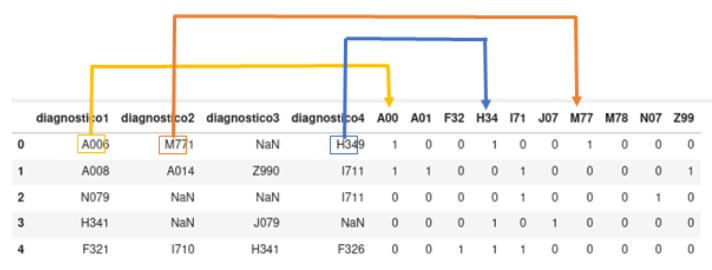

In [ ]:
values = df.values.flatten()
values = np.array([x for x in values if isinstance(x, str)])
values = np.array([x[:-1] for x in values])
values = list(set(values))
df[values] = 0

In [ ]:
for i in range(df.shape[0]):
  values_i = df.iloc[i,0:12].values
  values_i = np.array([x for x in values_i if isinstance(x, str)])
  values_i = np.array([x[:-1] for x in values_i])
  values_i = list(set(values_i))
  for j in values_i:
    if j in values:
      df.loc[i,j] = 1

In [ ]:
df.to_csv("diagnosticos_sln.csv")